# Exploratory Data Analysis

In [29]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [31]:
truck = pd.read_csv('Trucking_Data_Cleaned.csv')

In [32]:
truck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  296 non-null    object 
 1   OBS_DATE            296 non-null    object 
 2   TRUCK_D11           296 non-null    float64
 3   VMT                 296 non-null    float64
 4   VMT_D11             296 non-null    float64
 5   TSI_Freight         296 non-null    float64
 6   TSI_Freight_C       296 non-null    float64
 7   IND_PRO             296 non-null    float64
 8   MANUF               296 non-null    float64
 9   INV_TO_SALES        296 non-null    float64
 10  IDX_TRUCK_D11       296 non-null    float64
 11  PETROLEUM           296 non-null    float64
 12  IDX_PETROLEUM_D11   296 non-null    float64
 13  NATURAL_GAS         296 non-null    float64
 14  IDX_RAIL_PM         296 non-null    float64
 15  IDX_WATERBORNE_D11  296 non-null    float64
 16  date_tim

In [33]:
truck

,ID,OBS_DATE,TRUCK_D11,VMT,VMT_D11,TSI_Freight,TSI_Freight_C,IND_PRO,MANUF,INV_TO_SALES,IDX_TRUCK_D11,PETROLEUM,IDX_PETROLEUM_D11,NATURAL_GAS,IDX_RAIL_PM,IDX_WATERBORNE_D11,date_time
0,SATD200002,02/01/2000,78.2,199261.0,228727.0,103.0,-2.0,99.172683,97.084809,1.56,1.0445,210132.0,1.0183,2330.7,0.9534,0.9844,2000-02-01
1,SATD200003,03/01/2000,74.7,232490.0,230237.0,99.8,-3.1,99.560293,99.767561,1.55,0.9971,216833.0,0.9823,2050.6,0.9759,1.0619,2000-03-01
2,SATD200004,04/01/2000,72.6,227698.0,229068.0,97.9,-1.9,100.190526,101.496288,1.58,0.9689,219340.0,0.9932,1783.3,1.0006,1.0289,2000-04-01
3,SATD200005,05/01/2000,73.2,242501.0,229651.0,98.8,0.9,100.481153,99.714734,1.59,0.9768,225649.0,0.9782,1632.9,1.0186,1.0630,2000-05-01
4,SATD200006,06/01/2000,75.1,242963.0,230024.0,99.8,1.0,100.553701,101.306682,1.60,1.0020,225621.0,0.9864,1513.1,0.9829,0.9822,2000-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,SATD202405,05/01/2024,114.8,293459.0,274266.0,138.9,2.5,111.341824,167.000571,1.31,1.5332,361734.0,1.5698,2335.7,1.2035,1.0617,2024-05-01
292,SATD202406,06/01/2024,113.8,284472.0,274289.0,138.5,-0.3,111.637748,168.029126,1.33,1.5190,346392.0,1.5394,2432.8,1.1572,1.0654,2024-06-01
293,SATD202407,07/01/2024,114.1,293355.0,274491.0,138.8,0.2,110.859932,169.387493,1.32,1.5230,362586.0,1.5738,2747.5,1.0597,1.0468,2024-07-01
294,SATD202408,08/01/2024,115.2,294242.0,275132.0,140.2,1.0,111.453620,168.241005,1.33,1.5385,359343.0,1.5639,2720.5,1.1760,1.0569,2024-08-01


In [34]:
truck.drop(['ID','OBS_DATE'], axis=1)

,TRUCK_D11,VMT,VMT_D11,TSI_Freight,TSI_Freight_C,IND_PRO,MANUF,INV_TO_SALES,IDX_TRUCK_D11,PETROLEUM,IDX_PETROLEUM_D11,NATURAL_GAS,IDX_RAIL_PM,IDX_WATERBORNE_D11,date_time
0,78.2,199261.0,228727.0,103.0,-2.0,99.172683,97.084809,1.56,1.0445,210132.0,1.0183,2330.7,0.9534,0.9844,2000-02-01
1,74.7,232490.0,230237.0,99.8,-3.1,99.560293,99.767561,1.55,0.9971,216833.0,0.9823,2050.6,0.9759,1.0619,2000-03-01
2,72.6,227698.0,229068.0,97.9,-1.9,100.190526,101.496288,1.58,0.9689,219340.0,0.9932,1783.3,1.0006,1.0289,2000-04-01
3,73.2,242501.0,229651.0,98.8,0.9,100.481153,99.714734,1.59,0.9768,225649.0,0.9782,1632.9,1.0186,1.0630,2000-05-01
4,75.1,242963.0,230024.0,99.8,1.0,100.553701,101.306682,1.60,1.0020,225621.0,0.9864,1513.1,0.9829,0.9822,2000-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,114.8,293459.0,274266.0,138.9,2.5,111.341824,167.000571,1.31,1.5332,361734.0,1.5698,2335.7,1.2035,1.0617,2024-05-01
292,113.8,284472.0,274289.0,138.5,-0.3,111.637748,168.029126,1.33,1.5190,346392.0,1.5394,2432.8,1.1572,1.0654,2024-06-01
293,114.1,293355.0,274491.0,138.8,0.2,110.859932,169.387493,1.32,1.5230,362586.0,1.5738,2747.5,1.0597,1.0468,2024-07-01
294,115.2,294242.0,275132.0,140.2,1.0,111.453620,168.241005,1.33,1.5385,359343.0,1.5639,2720.5,1.1760,1.0569,2024-08-01


In [35]:
truck['date_time'] = pd.to_datetime(truck['date_time'])

In [36]:
truck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  296 non-null    object        
 1   OBS_DATE            296 non-null    object        
 2   TRUCK_D11           296 non-null    float64       
 3   VMT                 296 non-null    float64       
 4   VMT_D11             296 non-null    float64       
 5   TSI_Freight         296 non-null    float64       
 6   TSI_Freight_C       296 non-null    float64       
 7   IND_PRO             296 non-null    float64       
 8   MANUF               296 non-null    float64       
 9   INV_TO_SALES        296 non-null    float64       
 10  IDX_TRUCK_D11       296 non-null    float64       
 11  PETROLEUM           296 non-null    float64       
 12  IDX_PETROLEUM_D11   296 non-null    float64       
 13  NATURAL_GAS         296 non-null    float64       

In [37]:
gdp =  pd.read_csv('GDP.csv')

In [38]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  312 non-null    object 
 1   GDP               312 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


In [39]:
gdp

,observation_date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
307,2023-10-01,28296.967
308,2024-01-01,28624.069
309,2024-04-01,29016.714
310,2024-07-01,29374.914


In [40]:
gdp['observation_date'] = pd.to_datetime(gdp['observation_date'])

In [41]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  312 non-null    datetime64[ns]
 1   GDP               312 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


In [42]:
truck['quarter'] = truck['date_time'].dt.to_period('Q')
gdp['quarter'] = gdp['observation_date'].dt.to_period('Q')

In [43]:
df = pd.merge(truck, gdp, on='quarter',how='left')

In [44]:
df

,ID,OBS_DATE,TRUCK_D11,VMT,VMT_D11,TSI_Freight,TSI_Freight_C,IND_PRO,MANUF,INV_TO_SALES,IDX_TRUCK_D11,PETROLEUM,IDX_PETROLEUM_D11,NATURAL_GAS,IDX_RAIL_PM,IDX_WATERBORNE_D11,date_time,quarter,observation_date,GDP
0,SATD200002,02/01/2000,78.2,199261.0,228727.0,103.0,-2.0,99.172683,97.084809,1.56,1.0445,210132.0,1.0183,2330.7,0.9534,0.9844,2000-02-01,2000Q1,2000-01-01,10002.179
1,SATD200003,03/01/2000,74.7,232490.0,230237.0,99.8,-3.1,99.560293,99.767561,1.55,0.9971,216833.0,0.9823,2050.6,0.9759,1.0619,2000-03-01,2000Q1,2000-01-01,10002.179
2,SATD200004,04/01/2000,72.6,227698.0,229068.0,97.9,-1.9,100.190526,101.496288,1.58,0.9689,219340.0,0.9932,1783.3,1.0006,1.0289,2000-04-01,2000Q2,2000-04-01,10247.720
3,SATD200005,05/01/2000,73.2,242501.0,229651.0,98.8,0.9,100.481153,99.714734,1.59,0.9768,225649.0,0.9782,1632.9,1.0186,1.0630,2000-05-01,2000Q2,2000-04-01,10247.720
4,SATD200006,06/01/2000,75.1,242963.0,230024.0,99.8,1.0,100.553701,101.306682,1.60,1.0020,225621.0,0.9864,1513.1,0.9829,0.9822,2000-06-01,2000Q2,2000-04-01,10247.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,SATD202405,05/01/2024,114.8,293459.0,274266.0,138.9,2.5,111.341824,167.000571,1.31,1.5332,361734.0,1.5698,2335.7,1.2035,1.0617,2024-05-01,2024Q2,2024-04-01,29016.714
292,SATD202406,06/01/2024,113.8,284472.0,274289.0,138.5,-0.3,111.637748,168.029126,1.33,1.5190,346392.0,1.5394,2432.8,1.1572,1.0654,2024-06-01,2024Q2,2024-04-01,29016.714
293,SATD202407,07/01/2024,114.1,293355.0,274491.0,138.8,0.2,110.859932,169.387493,1.32,1.5230,362586.0,1.5738,2747.5,1.0597,1.0468,2024-07-01,2024Q3,2024-07-01,29374.914
294,SATD202408,08/01/2024,115.2,294242.0,275132.0,140.2,1.0,111.453620,168.241005,1.33,1.5385,359343.0,1.5639,2720.5,1.1760,1.0569,2024-08-01,2024Q3,2024-07-01,29374.914


In [45]:
df1 = df.drop(['ID', 'OBS_DATE','observation_date'],axis=1)

In [46]:
df1.isnull().sum()

TRUCK_D11             0
VMT                   0
VMT_D11               0
TSI_Freight           0
TSI_Freight_C         0
IND_PRO               0
MANUF                 0
INV_TO_SALES          0
IDX_TRUCK_D11         0
PETROLEUM             0
IDX_PETROLEUM_D11     0
NATURAL_GAS           0
IDX_RAIL_PM           0
IDX_WATERBORNE_D11    0
date_time             0
quarter               0
GDP                   0
dtype: int64

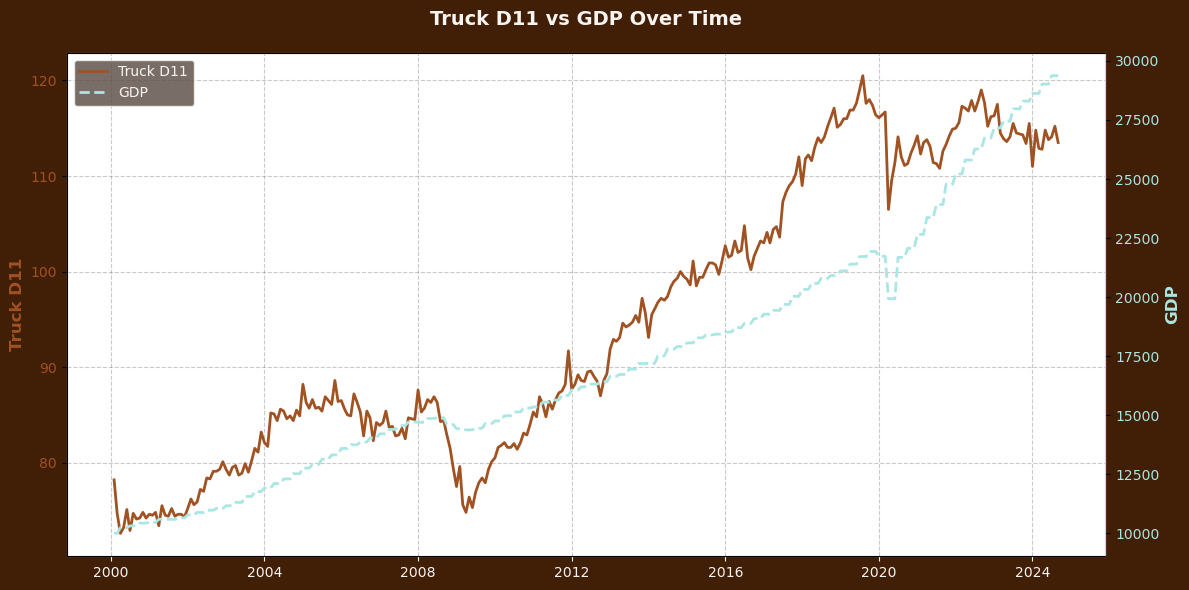

In [47]:
fig, ax1 = plt.subplots(figsize=(12,6), facecolor='#411E06')  # Dark brown base
fig.patch.set_facecolor('#411E06')  # Set figure background

# Plot truck data on primary axis using Terracotta
ax1.plot(df1['date_time'], df1['TRUCK_D11'], 
        color='#A05222',  # Terracotta
        linewidth=2, 
        label='Truck D11')
ax1.set_ylabel('Truck D11', color='#A05222', fontsize=12, weight='bold')
ax1.tick_params(axis='y', labelcolor='#A05222')
ax1.tick_params(axis='x', colors='#F8F4F1')  # Off-white x-ticks

# Create secondary axis for GDP using Teal
ax2 = ax1.twinx()
ax2.plot(df1['date_time'], df1['GDP'], 
        color='#AAE6E3',  # Teal
        linestyle='--', 
        linewidth=2, 
        label='GDP')
ax2.set_ylabel('GDP', color='#AAE6E3', fontsize=12, weight='bold')
ax2.tick_params(axis='y', labelcolor='#AAE6E3')

# Styling common elements
plt.title('Truck D11 vs GDP Over Time', 
         color='#F8F4F1',  # Off-white title
         fontsize=14, 
         pad=20, 
         weight='bold')

# Custom grid and spines
ax1.grid(color='#584A41',  # Taupe grid
        alpha=0.3, 
        linestyle='--')
for spine in ax1.spines.values():
    spine.set_color('#F8F4F1')  # Off-white borders
ax2.spines['right'].set_color('#AAE6E3')  # Teal right spine

# Legend styling
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
leg = ax1.legend(lines, labels, 
               loc='upper left', 
               facecolor='#584A41',  # Taupe background
               edgecolor='#F8F4F1',   # Off-white border
               fontsize=10)
for text in leg.get_texts():
    text.set_color('#F8F4F1')  # Legend text color

# X-axis label rotation and color
plt.xticks(rotation=45, color='#F8F4F1')

# Tight layout with background preservation
fig.tight_layout()
plt.savefig('truck_gdp.png', dpi=300, bbox_inches='tight', facecolor='#411E06')
plt.show()

In [48]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
TRUCK_D11,296.0,94.613514,72.6,82.8,88.6,111.325,120.5,14.689783
VMT,296.0,252942.550676,167617.0,239766.75,254367.0,265335.75,294242.0,20586.956234
VMT_D11,296.0,252836.861486,167174.0,245816.25,250205.0,265382.75,285452.0,13863.456906
TSI_Freight,296.0,118.082095,95.1,108.05,113.45,132.8,141.4,13.576415
TSI_Freight_C,296.0,0.101351,-7.5,-0.6,0.2,0.825,3.2,1.291038
IND_PRO,296.0,105.124515,91.550319,100.430715,106.680979,109.901041,112.557202,5.401096
MANUF,296.0,126.662123,91.382067,109.486222,130.316533,138.072958,169.387493,20.880068
INV_TO_SALES,296.0,1.43777,1.1,1.38,1.46,1.51,1.68,0.117209
IDX_TRUCK_D11,296.0,1.26313,0.9689,1.10565,1.18255,1.4864,1.6085,0.196135
PETROLEUM,296.0,247130.570946,171319.0,209668.0,225635.0,283855.0,362586.0,48051.003054


In [49]:
df1['TRUCK_D11'].corr(df1['GDP'])

0.9246356459794784

## Staggering Correlation 

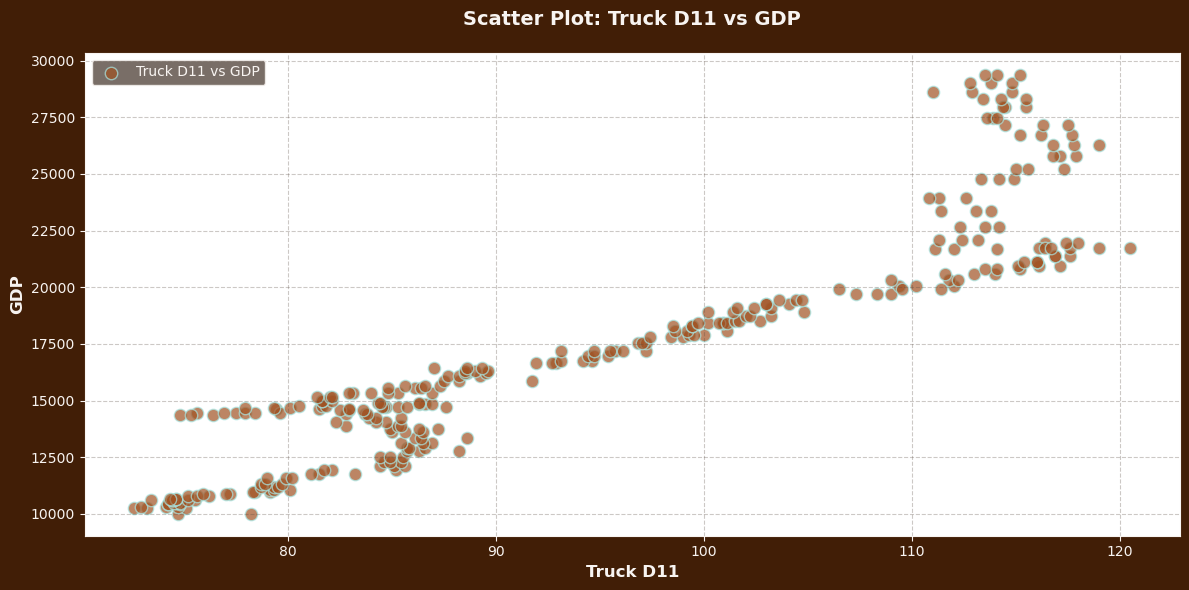

In [50]:
import matplotlib.pyplot as plt

# Create figure and axis with custom styling
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#411E06')  # Dark brown base
fig.patch.set_facecolor('#411E06')  # Set figure background

# Scatter plot of Truck D11 vs GDP using Terracotta and Teal
ax.scatter(df1['TRUCK_D11'], df1['GDP'], 
           color='#A05222',  # Terracotta
           edgecolors='#AAE6E3',  # Teal edges
           alpha=0.7, 
           s=80,  # Size of points
           label='Truck D11 vs GDP')

# Labels and title
ax.set_xlabel('Truck D11', color='#F8F4F1', fontsize=12, weight='bold')
ax.set_ylabel('GDP', color='#F8F4F1', fontsize=12, weight='bold')
ax.set_title('Scatter Plot: Truck D11 vs GDP', 
             color='#F8F4F1', fontsize=14, pad=20, weight='bold')

# Custom grid and spines
ax.grid(color='#584A41', alpha=0.3, linestyle='--')
for spine in ax.spines.values():
    spine.set_color('#F8F4F1')  # Off-white borders

# Legend styling
leg = ax.legend(loc='upper left', 
                facecolor='#584A41',  # Taupe background
                edgecolor='#F8F4F1',  # Off-white border
                fontsize=10)
for text in leg.get_texts():
    text.set_color('#F8F4F1')  # Legend text color

# X and Y ticks
ax.tick_params(axis='x', colors='#F8F4F1')
ax.tick_params(axis='y', colors='#F8F4F1')

# Tight layout with background preservation
fig.tight_layout()
plt.savefig('truck_gdp_scatter.png', dpi=300, bbox_inches='tight', facecolor='#411E06')
plt.show()


In [64]:
df1.to_csv('trucking_vs_econ.csv')

## Statistical Analysis

### Trucking Activity and GDP

#### Null Hypothesis (H₀): Trucking activity (TRUCK_D11) does not significantly differ between high and low GDP periods

#### Alternative Hypothesis (H₁): Trucking activity significantly differs between high and low GDP periods

#### Binarize GDP

In [51]:
median_gdp = df1['GDP'].median()

# Create a new column to categorize GDP as High or Low
df1['GDP_GROUP'] = np.where(df1['GDP'] > median_gdp, 'High', 'Low')

#### Check for Normality

In [52]:
from scipy.stats import shapiro

# Test normality for Truck D11
stat, p = shapiro(df1['TRUCK_D11'])
print(f"Normality p-value: {p}")  # p > 0.05 → normal distribution

Normality p-value: 5.009808757075462e-13


In [53]:
stat, p = shapiro(df1['GDP'])
print(f"Normality p-value: {p}")  # p > 0.05 → normal distribution

Normality p-value: 1.0499237035332953e-09


#### Equal Variance

In [54]:
from scipy.stats import levene  
high = df1[df1['GDP_GROUP'] == 'High']['TRUCK_D11']  
low = df1[df1['GDP_GROUP'] == 'Low']['TRUCK_D11']  
stat, p = levene(high, low)  
print(f"Equal variance p-value: {p}")  # p > 0.05 → assume equal variance 

Equal variance p-value: 3.1275817848836075e-10


#### Running Tests

##### Independent T tests

In [55]:
from scipy.stats import ttest_ind  
t_stat, p_value = ttest_ind(high, low, equal_var=True)  
print(f"t-stat: {t_stat}, p-value: {p_value}")  

t-stat: 31.737895819205534, p-value: 5.707523671367644e-97


##### Mann-Whitney U

In [56]:
from scipy.stats import mannwhitneyu  
u_stat, p_value = mannwhitneyu(high, low)  
print(f"U-stat: {u_stat}, p-value: {p_value}")  

U-stat: 21873.5, p-value: 8.867505879876794e-50


#### Measuring the Effect Size

In [57]:
def cohens_d(group1, group2):  
    diff = np.mean(group1) - np.mean(group2)  
    pooled_std = np.sqrt((np.std(group1)**2 + np.std(group2)**2) / 2)  
    return diff / pooled_std  
print(f"Cohen's d: {cohens_d(high, low)}")

Cohen's d: 3.6950502691403457


In [58]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df1['TRUCK_D11'], df1['GDP'])
print(f"Pearson correlation: {corr}, p-value: {p_value}")

Pearson correlation: 0.9246356459794784, p-value: 2.7784992478474627e-125


#### Granger Casuality Test

In [59]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df1[['TRUCK_D11', 'GDP']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3004  , p=0.2551  , df_denom=292, df_num=1
ssr based chi2 test:   chi2=1.3137  , p=0.2517  , df=1
likelihood ratio test: chi2=1.3108  , p=0.2522  , df=1
parameter F test:         F=1.3004  , p=0.2551  , df_denom=292, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0545  , p=0.9470  , df_denom=289, df_num=2
ssr based chi2 test:   chi2=0.1109  , p=0.9461  , df=2
likelihood ratio test: chi2=0.1108  , p=0.9461  , df=2
parameter F test:         F=0.0545  , p=0.9470  , df_denom=289, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1077  , p=0.9555  , df_denom=286, df_num=3
ssr based chi2 test:   chi2=0.3311  , p=0.9541  , df=3
likelihood ratio test: chi2=0.3309  , p=0.9541  , df=3
parameter F test:         F=0.1077  , p=0.9555  , df_denom=286, df_num=3


{1: ({'ssr_ftest': (1.3003897371567597, 0.25507650846663804, 292.0, 1),
   'ssr_chi2test': (1.3137499056891924, 0.25171683527111116, 1),
   'lrtest': (1.3108332418185, 0.2522438478088613, 1),
   'params_ftest': (1.300389737154199, 0.25507650846710883, 292.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.054488126603873165, 0.9469794785565057, 289.0, 2),
   'ssr_chi2test': (0.11086165551237863, 0.9460774637080749, 2),
   'lrtest': (0.11084075888334155, 0.9460873486746151, 2),
   'params_ftest': (0.05448812660419326, 0.9469794785562169, 289.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.10772608429446137, 0.9555383350787772, 286.0, 3),
   'ssr_chi2test': (0.33108821012178863, 0.954079411325885, 3),
   'lrtest': (0.3309012870956849, 0.954115770065689, 3),
   'params_ftest': (0.10772608429436077, 0.9555383350788326, 286.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [60]:
grangercausalitytests(df1[['GDP', 'TRUCK_D11']], maxlag=3, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2979  , p=0.5856  , df_denom=292, df_num=1
ssr based chi2 test:   chi2=0.3010  , p=0.5833  , df=1
likelihood ratio test: chi2=0.3008  , p=0.5834  , df=1
parameter F test:         F=0.2979  , p=0.5856  , df_denom=292, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6762  , p=0.0705  , df_denom=289, df_num=2
ssr based chi2 test:   chi2=5.4450  , p=0.0657  , df=2
likelihood ratio test: chi2=5.3952  , p=0.0674  , df=2
parameter F test:         F=2.6762  , p=0.0705  , df_denom=289, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.8938  , p=0.0006  , df_denom=286, df_num=3
ssr based chi2 test:   chi2=18.1141 , p=0.0004  , df=3
likelihood ratio test: chi2=17.5763 , p=0.0005  , df=3
parameter F test:         F=5.8938  , p=0.0006  , df_denom=286, df_num=3


C:\Users\supre\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (0.2978972920681974, 0.5856203604672898, 292.0, 1),
   'ssr_chi2test': (0.3009578806853364, 0.5832825379019998, 1),
   'lrtest': (0.3008044669741139, 0.5833785312683658, 1),
   'params_ftest': (0.2978972920681475, 0.5856203604672898, 292.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.6761972978461896, 0.0705300107606168, 289.0, 2),
   'ssr_chi2test': (5.444996578316814, 0.06571038564746756, 2),
   'lrtest': (5.395188863024487, 0.06736737481049368, 2),
   'params_ftest': (2.6761972978461084, 0.07053001076062318, 289.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (5.893796084252745, 0.0006470894832453215, 286.0, 3),
   'ssr_chi2test': (18.11414950369987, 0.0004166374655936985, 3),
   'lrtest': (17.57627187509388, 0.0005378293382354522, 3),
   'params_ftest': (5.893796084252485, 0.0006470894832455376, 286.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.,

Based on the Granger test we see that GDP is a poor indicator for Trucking Activity even at a 3 month lag
however in reverse Trucking Activity at a 3 month lag is a strong indicator of GDP 

#### Partial Correlation

In [61]:
from pingouin import partial_corr

partial_corr(data=df1, x='TRUCK_D11', y='GDP', covar=['PETROLEUM', 'MANUF','INV_TO_SALES'], method='pearson')

,n,r,CI95%,p-val
pearson,296,0.395202,"[0.29, 0.49]",2.158330e-12


Given an R of 0.39 (moderate correlation) and a small p value, the relationship between trucking activity and GDP holds. Low chance of signigicant correlation from a confounding variable

In [62]:
df1.columns

Index(['TRUCK_D11', 'VMT', 'VMT_D11', 'TSI_Freight', 'TSI_Freight_C',
       'IND_PRO', 'MANUF', 'INV_TO_SALES', 'IDX_TRUCK_D11', 'PETROLEUM',
       'IDX_PETROLEUM_D11', 'NATURAL_GAS', 'IDX_RAIL_PM', 'IDX_WATERBORNE_D11',
       'date_time', 'quarter', 'GDP', 'GDP_GROUP'],
      dtype='object')

#### Time Series Forecasting

In [63]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df1['TRUCK_D11'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              TRUCK_D11   No. Observations:                  296
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -518.665
Date:                Mon, 17 Feb 2025   AIC                           1049.330
Time:                        08:43:23   BIC                           1071.452
Sample:                             0   HQIC                          1058.188
                                - 296                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3144      0.059     -5.295      0.000      -0.431      -0.198
ar.L2         -0.1231      0.067     -1.832      0.067      -0.255       0.009
ar.L3          0.0980      0.043      2.303      0.0